In [25]:
import pandas as pd
import numpy as np

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv("C:/Users/User/Downloads/car performance.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Uunderstanding and preparing data

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


Checking for missing values

In [29]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

There are no missing values

Statistical Summary

In [30]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [31]:
data.describe(include='object')

,car name
count,398
unique,305
top,ford pinto
freq,6


EDA

In [32]:
import warnings
warnings.filterwarnings('ignore')

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model year'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

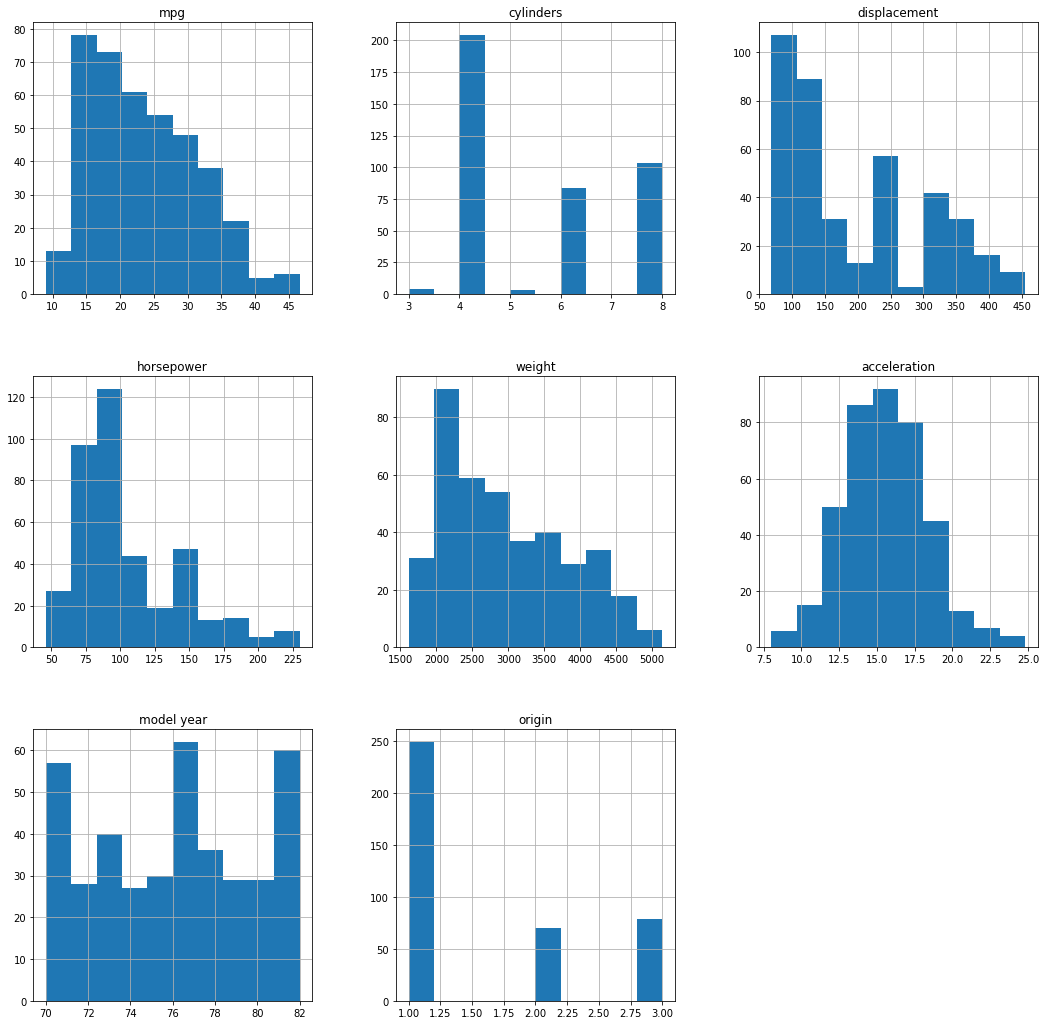

In [33]:
data.hist(figsize=(18, 18))

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


Splitting train and test values

In [35]:
X = data.iloc[:, 1:8].values
y = data.iloc[:,0].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

Normalizing

In [37]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

In [38]:
X_train = sd.fit_transform(X_train)
X_test = sd.fit_transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

Prediction

In [40]:
prediction = model.predict(X_test)
prediction

array([14.58333333, 24.79333333, 14.56666667, 20.15      , 18.73333333,
       29.61666667, 32.72666667, 20.9       , 14.51666667, 25.81333333,
       33.25      , 36.04666667, 18.81666667, 25.95333333, 16.84      ,
       31.54      , 27.76      , 27.12333333, 17.67666667, 32.95666667,
       15.82333333, 24.02      , 23.58      , 19.88666667, 32.84666667,
       26.90666667, 33.40333333, 30.33      , 31.35      , 16.52333333,
       19.23      , 32.94666667, 17.93      , 31.27666667, 21.41333333,
       23.70666667, 19.24333333, 16.50333333, 36.45666667, 12.6       ,
       13.        , 14.96666667, 27.85666667, 33.36333333, 29.36      ,
       22.67      , 19.74      , 14.58333333, 22.48666667, 29.05      ,
       33.04      , 25.80333333, 16.85666667, 26.7       , 15.59      ,
       12.86666667, 19.66666667, 22.77333333, 31.59666667, 16.80333333,
       18.92      , 25.35333333, 20.07666667, 21.53333333, 13.25      ,
       14.8       , 13.93333333, 16.95      , 24.43333333, 14.1 

In [41]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, prediction)
accuracy

0.8948289556923962

In [42]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [43]:
X.shape

(398, 7)

In [44]:
y.shape

(398,)